# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


In [3]:
# Display the image
cv2.imshow('IMG',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
lower_green = np.array([0,220,0]) 
higher_green = np.array([50,255,50])

mask = np.copy(image)

masked = cv2.inRange(mask, lower_green, higher_green)

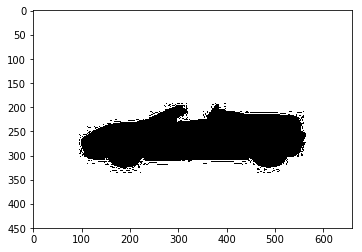

In [18]:
plt.imshow(masked, cmap='gray')

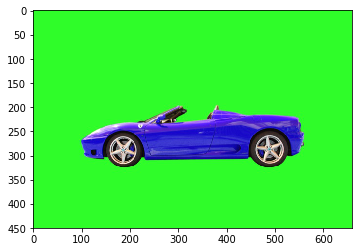

In [21]:
plt.imshow(mask)

In [22]:
mask[masked !=0] = [0,0,0]

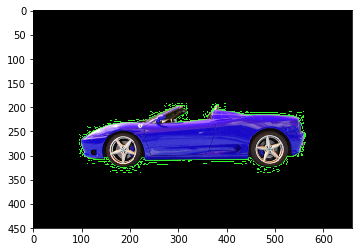

In [23]:
plt.imshow(mask)

In [24]:
bgimg =mpimg.imread('images/sky.jpg')

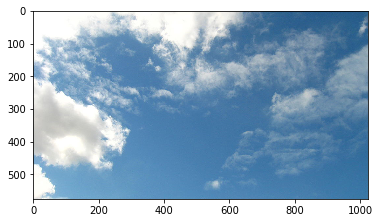

In [25]:
plt.imshow(bgimg)

In [46]:
h,w,_ = image.shape

In [47]:
newbgimg = np.copy(bgimg)
newbgimg = newbgimg[0:h, 0:w]

In [48]:
newbgimg.shape

(450, 660, 3)

In [49]:
newbgimg[masked == 0] = [0,0,0]

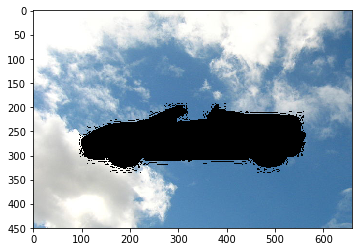

In [50]:
plt.imshow(newbgimg)

### complete image

In [51]:
total = mask + newbgimg

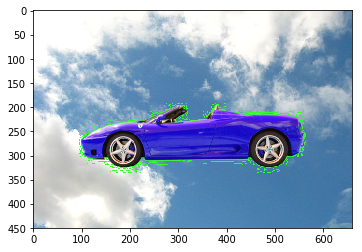

In [52]:
plt.imshow(total)

### Define the color threshold

In [22]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,220,0]) 
upper_green = np.array([50,255,50])


### Create a mask

(450, 660)


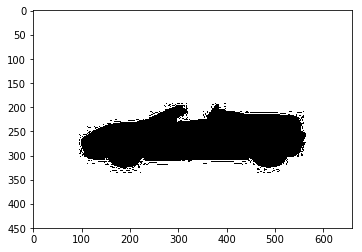

In [23]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')
print(mask.shape)

In [88]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
cv2.imshow('mask', masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Mask and add a background image

In [89]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

## TODO: Crop it or resize the background to be the right size (450x660)
shape = image.shape
height = shape[0]
width = shape[1]

crop_background_image = background_image[0:height, 0:width]
# cv2.imshow('bg',crop_background_image)
print(crop_background_image.shape)

## TODO: Mask the cropped background so that the car area is blocked

crop_background_image[mask == 0] = [0,0,0]
cv2.imshow('crop_background_image',crop_background_image)

# Hint mask the opposite area of the previous image

## TODO: Display the background and make sure

cv2.waitKey(0)
cv2.destroyAllWindows()

(450, 660, 3)


### Create a complete image

In [17]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background

completed_img = masked_image + crop_background_image
cv2.imshow('completed_img',completed_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Another try

In [93]:
img = mpimg.imread('images/car_green_screen.jpg')
nimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.imshow('img',nimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

### creating mask

In [94]:
lower_blue = np.array([0,220,0])
higher_blue = np.array([80,255,50])

mask = cv2.inRange(img, lower_blue, higher_blue)

In [87]:
cv2.imshow('mask', mask,)
cv2.waitKey(0)
cv2.destroyAllWindows()

### getting the background

In [72]:
background = mpimg.imread('images/space_background.jpg')

(450, 660, 3)


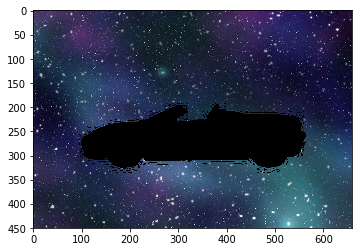

In [92]:
shape = img.shape
print(shape)
height = shape[0]
width = shape[1]

cropped = background[0:height, 0:width]

new_crop = np.copy(cropped)
# plt.imshow(new_crop)
new_crop[mask == 0] = [0,0,0]
plt.imshow(new_crop)



### getting the foreground

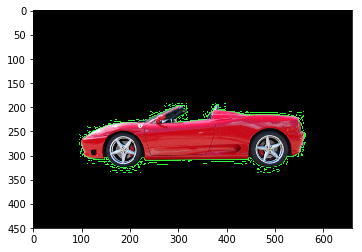

In [99]:
new_img = np.copy(img)

new_img[mask != 0] = [0,0,0]
plt.imshow(new_img)

### merging both

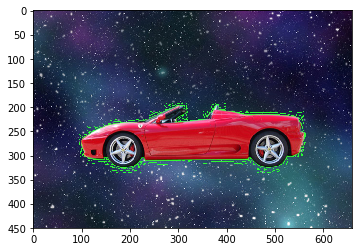

In [100]:
complete = new_crop + new_img
plt.imshow(complete)